In [ ]:
# Importando las bibliotecas necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Cargar los datos
dataset = pd.read_csv('/content/drive/MyDrive/Universidad/Plan de estudios/Plan de estudios CC/7mo Semestre/11vo Semestre/Reconocimiento de Patrones/cascadia_data_set.csv')

# Nombres de las columnas
column_names = [
    'id', 'mac_address', 'type', 'data', 'keepalive', 'control',
    'pid_coolant_temp', 'pid_engine_rpm', 'pid_vehicle_speed', 'pid_battery_voltage',
    'pid_oil_pressure', 'gps_lati', 'gps_long', 'ecu_err_code', 'lamp_status',
    'j939_request', 'j939_response', 'j939_control', 'gprs_rssi',
    'gprs_voltage_baterry', 'gps_num_sat', 'panic', 'bat_status', 'can_status',
    'fuel_rate', 'inst_fuel_eco', 'avg_fuel_eco', 'esp32_voltage', 'fuel_level',
    'ecu_err_code1', 'lamp_status1', 'act_partition', 'avg_esp32_voltage',
    'avg_gprs_voltage_baterry', 'created_at', 'fw', 'ipv4', 'upg_status',
    'upgrade', 'vdhr', 'ESP32TEMP']

dataset.columns = column_names


In [ ]:
dataset.head()

,id,mac_address,type,data,keepalive,control,pid_coolant_temp,pid_engine_rpm,pid_vehicle_speed,pid_battery_voltage,...,act_partition,avg_esp32_voltage,avg_gprs_voltage_baterry,created_at,fw,ipv4,upg_status,upgrade,vdhr,ESP32TEMP
0,72412,0C:B8:15:EC:A4:FC,0,0,2023/07/29 10:57:58,NaN,0,0,0,0.0,...,1,4565,4297,2023-07-29 10:57:58.000,1.0.0c,10.5.248.142,0,0,0,0.0
1,72414,0C:B8:15:EC:A4:FC,0,0,2023/07/29 10:58:16,NaN,0,0,0,0.0,...,1,4563,4296,2023-07-29 10:58:16.000,1.0.0c,10.5.248.142,0,0,0,0.0
2,72418,0C:B8:15:EC:A4:FC,0,0,2023/07/29 10:59:33,NaN,0,0,0,0.0,...,1,4556,4295,2023-07-29 10:59:33.000,1.0.0c,10.51.20.4,0,0,0,0.0
3,72422,0C:B8:15:EC:A4:FC,0,0,2023/07/29 10:59:49,NaN,0,0,0,0.0,...,1,4553,4294,2023-07-29 10:59:49.000,1.0.0c,10.51.20.4,0,0,0,0.0
4,72427,0C:B8:15:EC:A4:FC,0,0,2023/07/29 11:01:20,NaN,0,0,0,0.0,...,1,4548,4294,2023-07-29 11:01:20.000,1.0.0c,10.52.1.82,0,0,0,0.0


In [ ]:
dataset.shape

(164603, 41)

In [ ]:
# Convertir la columna 'created_at' a tipo datetime y establecerla como índice
dataset['created_at'] = pd.to_datetime(dataset['created_at'])
dataset.set_index('created_at', inplace=True)

dataset.head()


,id,mac_address,type,data,keepalive,control,pid_coolant_temp,pid_engine_rpm,pid_vehicle_speed,pid_battery_voltage,...,lamp_status1,act_partition,avg_esp32_voltage,avg_gprs_voltage_baterry,fw,ipv4,upg_status,upgrade,vdhr,ESP32TEMP
created_at,,,,,,,,,,,,,,,,,,,,,
2023-07-29 10:57:58,72412,0C:B8:15:EC:A4:FC,0,0,2023/07/29 10:57:58,NaN,0,0,0,0.0,...,NaN,1,4565,4297,1.0.0c,10.5.248.142,0,0,0,0.0
2023-07-29 10:58:16,72414,0C:B8:15:EC:A4:FC,0,0,2023/07/29 10:58:16,NaN,0,0,0,0.0,...,NaN,1,4563,4296,1.0.0c,10.5.248.142,0,0,0,0.0
2023-07-29 10:59:33,72418,0C:B8:15:EC:A4:FC,0,0,2023/07/29 10:59:33,NaN,0,0,0,0.0,...,NaN,1,4556,4295,1.0.0c,10.51.20.4,0,0,0,0.0
2023-07-29 10:59:49,72422,0C:B8:15:EC:A4:FC,0,0,2023/07/29 10:59:49,NaN,0,0,0,0.0,...,NaN,1,4553,4294,1.0.0c,10.51.20.4,0,0,0,0.0
2023-07-29 11:01:20,72427,0C:B8:15:EC:A4:FC,0,0,2023/07/29 11:01:20,NaN,0,0,0,0.0,...,NaN,1,4548,4294,1.0.0c,10.52.1.82,0,0,0,0.0


In [ ]:
# Agrupar los datos por semana y calcular el promedio (sólo para columnas numéricas)
weekly_data = dataset.resample('W').mean(numeric_only=True)

# Resetear el índice
weekly_data.reset_index(inplace=True)

weekly_data.head()

,created_at,id,type,data,control,pid_coolant_temp,pid_engine_rpm,pid_vehicle_speed,pid_battery_voltage,pid_oil_pressure,...,avg_fuel_eco,esp32_voltage,fuel_level,act_partition,avg_esp32_voltage,avg_gprs_voltage_baterry,upg_status,upgrade,vdhr,ESP32TEMP
0,2023-07-30,78596.926358,0.0,0.0,NaN,55.542223,616.490759,24.036110,8.905388,23.661075,...,2.050515,2485.166051,39.065397,1.0,4549.794143,4309.707990,0.0,0.0,216844.968155,0.000000
1,2023-08-06,112718.038874,0.0,0.0,NaN,43.121649,467.202313,16.368268,7.004463,17.829419,...,1.648756,2480.953080,30.553583,1.0,4540.399095,4301.927936,0.0,0.0,171963.860749,0.000152
2,2023-08-13,201486.163517,0.0,0.0,NaN,26.142372,275.049127,8.747314,4.274477,10.658443,...,0.831428,2487.702858,17.999151,1.0,4552.341896,4311.330687,0.0,0.0,105997.223642,1.110000
3,2023-08-20,293005.663661,0.0,0.0,NaN,40.620602,439.836054,15.477538,6.582699,16.581585,...,1.972601,2502.844966,29.918338,1.0,4579.291673,4332.215348,0.0,0.0,164785.439660,1.110000
4,2023-08-27,400816.838280,0.0,0.0,NaN,33.372844,384.194055,14.601666,5.462159,14.591443,...,1.512225,2502.643279,27.034001,1.0,4578.824139,4332.001261,0.0,0.0,138463.887728,1.110000


In [ ]:
weekly_data.shape

(9, 32)

In [ ]:
# Limpieza de datos
# Eliminar la columna completamente vacía con NaN's y las columnas con 0's
features_to_exclude = ['id','upg_status', 'upgrade', 'j939_request']
weekly_data_cleaned = weekly_data.drop(columns=features_to_exclude)

weekly_data_cleaned.head()

,created_at,type,data,control,pid_coolant_temp,pid_engine_rpm,pid_vehicle_speed,pid_battery_voltage,pid_oil_pressure,gps_lati,...,fuel_rate,inst_fuel_eco,avg_fuel_eco,esp32_voltage,fuel_level,act_partition,avg_esp32_voltage,avg_gprs_voltage_baterry,vdhr,ESP32TEMP
0,2023-07-30,0.0,0.0,NaN,55.542223,616.490759,24.036110,8.905388,23.661075,30.782208,...,11.874751,2.632641,2.050515,2485.166051,39.065397,1.0,4549.794143,4309.707990,216844.968155,0.000000
1,2023-08-06,0.0,0.0,NaN,43.121649,467.202313,16.368268,7.004463,17.829419,31.665218,...,10.380898,1.822982,1.648756,2480.953080,30.553583,1.0,4540.399095,4301.927936,171963.860749,0.000152
2,2023-08-13,0.0,0.0,NaN,26.142372,275.049127,8.747314,4.274477,10.658443,27.318799,...,6.334716,0.859496,0.831428,2487.702858,17.999151,1.0,4552.341896,4311.330687,105997.223642,1.110000
3,2023-08-20,0.0,0.0,NaN,40.620602,439.836054,15.477538,6.582699,16.581585,30.913402,...,9.284129,1.910724,1.972601,2502.844966,29.918338,1.0,4579.291673,4332.215348,164785.439660,1.110000
4,2023-08-27,0.0,0.0,NaN,33.372844,384.194055,14.601666,5.462159,14.591443,26.974905,...,8.280757,1.512225,1.512225,2502.643279,27.034001,1.0,4578.824139,4332.001261,138463.887728,1.110000


In [ ]:
weekly_data_cleaned.shape

(9, 28)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


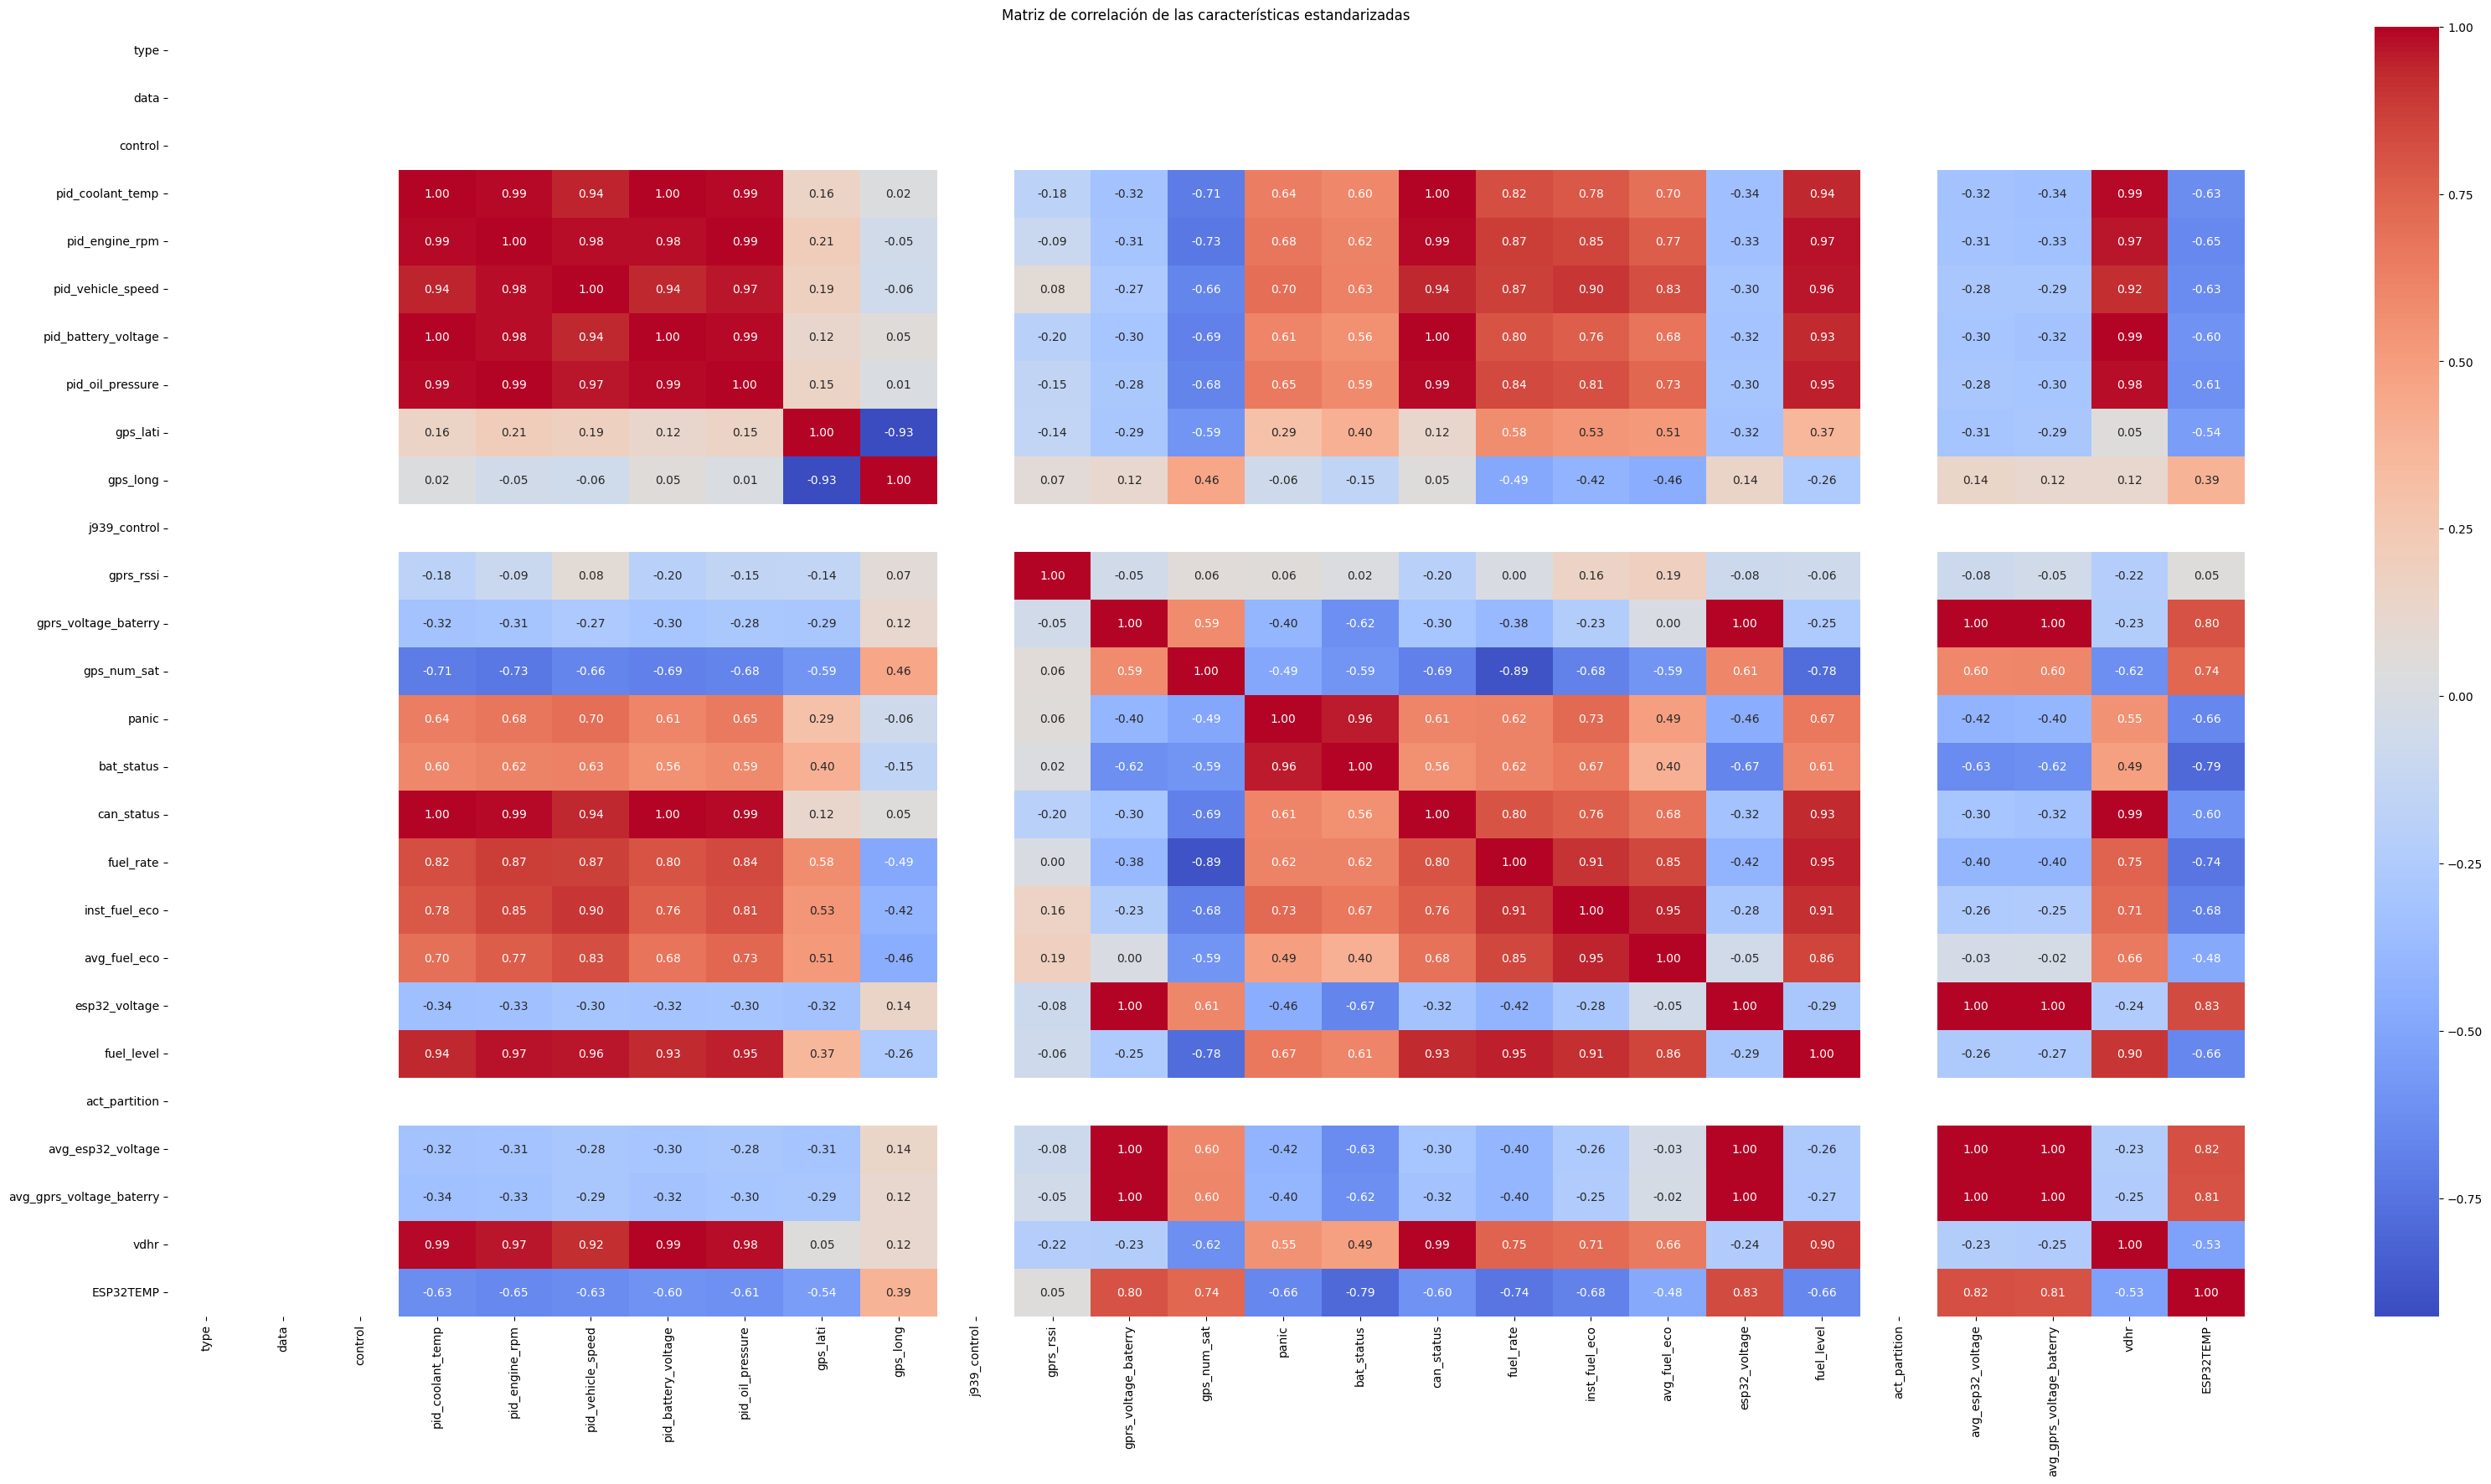

In [ ]:
# Asumiendo que weekly_data_cleaned es el DataFrame que ya tenemos
# Seleccionamos solo las columnas numéricas
numeric_features = weekly_data_cleaned.select_dtypes(include=[np.number])

# Estandarizamos las características numéricas
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_features)

# Convertimos de nuevo a DataFrame para poder usarlo en la matriz de correlación
scaled_features_df = pd.DataFrame(scaled_features, columns=numeric_features.columns)

# Calculamos la matriz de correlación
correlation_matrix = scaled_features_df.corr()

# Visualizamos la matriz de correlación
plt.figure(figsize=(40, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de correlación de las características estandarizadas")
plt.show()


#La elección de características que propongo conservar y las razones para hacerlo:

##Temperaturas:
Conservar: pid_coolant_temp

Razón: La temperatura del refrigerante puede ser un buen indicador del estado térmico del motor. No tengo información de otras mediciones de temperatura en los datos proporcionados.

##Voltajes:
Conservar: avg_esp32_voltage

Razón: Al promediar el voltaje a lo largo del tiempo, avg_esp32_voltage podría ser una medida más estable del estado de la batería y la energía del sistema. Dado que esp32_voltage y avg_esp32_voltage están probablemente relacionados, conservar el promedio reduce la volatilidad y la redundancia.

##Velocidad del Vehículo y Motor:
Conservar: pid_vehicle_speed

Razón: La velocidad del vehículo es directamente relevante para el uso y rendimiento del combustible y es una métrica que típicamente está estandarizada y es fácil de interpretar.

##Presión del Aceite:
Conservar: pid_oil_pressure

Razón: La presión del aceite es una métrica importante de la salud del motor. No hay otra medida de presión para comparar.
Coordenadas GPS:

##Conservar: Ambas (gps_lati y gps_long)

Razón: Las coordenadas de latitud y longitud son esenciales para el rastreo geográfico y generalmente se usan en conjunto para determinar la ubicación.

##Economía de Combustible:
Conservar: avg_fuel_eco

Razón: La economía de combustible promedio proporciona una medida general de la eficiencia a lo largo del tiempo, lo que puede ser más relevante para la predicción a largo plazo que las medidas instantáneas.

##Nivel de Combustible:
Conservar: fuel_level

Razón: El nivel de combustible es el objetivo de nuestra predicción y es fundamental para el análisis.

Con estas selecciones, buscamos reducir la redundancia y mantener la interpretabilidad de los datos. La idea es que cada una de estas características captura un aspecto único y relevante del comportamiento y estado del vehículo que estamos analizando.

In [ ]:
# Crearemos un nuevo DataFrame con solo las características seleccionadas
selected_features = [
    'pid_coolant_temp',
    'avg_esp32_voltage',
    'pid_vehicle_speed',
    'pid_oil_pressure',
    'gps_lati',
    'gps_long',
    'avg_fuel_eco',
    'fuel_level'
]

# Filtramos el DataFrame original para quedarnos solo con las características seleccionadas
reduced_dataset = weekly_data_cleaned[selected_features].copy()

# Verificamos las primeras filas del nuevo conjunto de datos reducido
reduced_dataset.head()


,pid_coolant_temp,avg_esp32_voltage,pid_vehicle_speed,pid_oil_pressure,gps_lati,gps_long,avg_fuel_eco,fuel_level
0,55.542223,4549.794143,24.036110,23.661075,30.782208,-109.240253,2.050515,39.065397
1,43.121649,4540.399095,16.368268,17.829419,31.665218,-113.913581,1.648756,30.553583
2,26.142372,4552.341896,8.747314,10.658443,27.318799,-105.213352,0.831428,17.999151
3,40.620602,4579.291673,15.477538,16.581585,30.913402,-111.659032,1.972601,29.918338
4,33.372844,4578.824139,14.601666,14.591443,26.974905,-108.956392,1.512225,27.034001


In [ ]:
reduced_dataset.shape

(9, 8)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

# Separar las características (X) de la variable objetivo (y)
X = reduced_dataset.drop('fuel_level', axis=1)
y = reduced_dataset['fuel_level']



In [ ]:
# Definir el modelo KNN
knn_model = KNeighborsRegressor()

# Realizar validación cruzada para el modelo KNN
knn_scores = cross_val_score(knn_model, X, y, cv=5, scoring='neg_mean_squared_error')
knn_rmse_scores = np.sqrt(-knn_scores)  # Calculamos la raíz cuadrada para obtener RMSE

# Mostrar los puntajes de validación cruzada para KNN
print(f"KNN RMSE: {np.mean(knn_rmse_scores):.3f} (+/- {np.std(knn_rmse_scores):.3f})")



KNN RMSE: 5.919 (+/- 2.778)


In [ ]:
# Definimos el modelo SVM
svm_model = SVR()

# Realizamos la validación cruzada
svm_scores = cross_val_score(svm_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculamos la raíz cuadrada de los resultados para obtener el RMSE
svm_rmse_scores = np.sqrt(-svm_scores)

# Calculamos el promedio y la desviación estándar de los RMSE
print(f"\nRMSE promedio: {svm_rmse_scores.mean():.3f}")
print(f"Desviación estándar del RMSE: {svm_rmse_scores.std():.3f}")


RMSE promedio: 6.728
Desviación estándar del RMSE: 2.865


In [ ]:
# Definimos el modelo de Árbol de Decisión
tree_model = DecisionTreeRegressor()

# Realizamos la validación cruzada
tree_scores = cross_val_score(tree_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculamos la raíz cuadrada de los resultados para obtener el RMSE
tree_rmse_scores = np.sqrt(-tree_scores)

# Calculamos el promedio y la desviación estándar de los RMSE
print(f"\nRMSE promedio: {tree_rmse_scores.mean():.3f}")
print(f"Desviación estándar del RMSE: {tree_rmse_scores.std():.3f}")



RMSE promedio: 2.910
Desviación estándar del RMSE: 1.976


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Definimos el modelo de Random Forest
rf_model = RandomForestRegressor(n_estimators=100)  # n_estimators es el número de árboles

# Realizamos la validación cruzada
rf_scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculamos el RMSE
rf_rmse_scores = np.sqrt(-rf_scores)

# Imprimimos los resultados
print("Resultados de RMSE para cada pliegue de validación cruzada (Random Forest):")
for i, score in enumerate(rf_rmse_scores, 1):
    print(f"RMSE Pliegue {i}: {score:.3f}")


Resultados de RMSE para cada pliegue de validación cruzada (Random Forest):
RMSE Pliegue 1: 7.746
RMSE Pliegue 2: 4.245
RMSE Pliegue 3: 1.071
RMSE Pliegue 4: 4.162
RMSE Pliegue 5: 2.499


In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

# Definimos los modelos base
estimators = [
    ('rf', RandomForestRegressor(n_estimators=10)),
    ('svr', SVR())
]

# Definimos el modelo final que combinará las predicciones
stacking_model = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())

# Realizamos la validación cruzada
stacking_scores = cross_val_score(stacking_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculamos el RMSE
stacking_rmse_scores = np.sqrt(-stacking_scores)

# Imprimimos los resultados
print("Resultados de RMSE para cada pliegue de validación cruzada (Stacking):")
for i, score in enumerate(stacking_rmse_scores, 1):
    print(f"RMSE Pliegue {i}: {score:.3f}")


Resultados de RMSE para cada pliegue de validación cruzada (Stacking):
RMSE Pliegue 1: 4.300
RMSE Pliegue 2: 11.876
RMSE Pliegue 3: 5.551
RMSE Pliegue 4: 4.862
RMSE Pliegue 5: 6.615


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Definimos el modelo de Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100)

# Realizamos la validación cruzada
gb_scores = cross_val_score(gb_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculamos el RMSE
gb_rmse_scores = np.sqrt(-gb_scores)

# Imprimimos los resultados
print("Resultados de RMSE para cada pliegue de validación cruzada (Gradient Boosting):")
for i, score in enumerate(gb_rmse_scores, 1):
    print(f"RMSE Pliegue {i}: {score:.3f}")


Resultados de RMSE para cada pliegue de validación cruzada (Gradient Boosting):
RMSE Pliegue 1: 5.966
RMSE Pliegue 2: 1.230
RMSE Pliegue 3: 0.580
RMSE Pliegue 4: 2.291
RMSE Pliegue 5: 2.717
